In [1]:
# Importamos los modulos necesarios

import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC, NuSVR, OneClassSVM

%matplotlib inline


In [2]:
#Importamos el ichero de entrada para entrenar el modelo
df = pd.DataFrame.from_csv('DATA_SALIDA/posneg2.csv', sep='|')
df.head()

,label,texto
kk,,
0,neg,que majos mis compis de verti que me ponen a l...
0,neg,wow verti refresco en mi taza de cafe el sprit...
0,neg,rariasg venga vaaaaaa nos lo pensaremos de mom...
0,neg,rmmoreno ya estamos en el mercado nos tienes o...
0,neg,le he dado una oportunidad a verti .es con el ...


In [3]:
#Separamos los campos
texto = list(df['texto'])
labels = list(df['label'])


In [4]:
# Dividimos el fichero de entrada en test y train
# Fichero de entrenamiento: 70% del total
tamtrain = int(len(texto) * 0.7)

# Creamos los ficheros
train_texto = texto[:tamtrain]
train_labels = labels[:tamtrain]

test_texto = texto[tamtrain:]
test_labels = labels[tamtrain:]



In [5]:
# Convertimos el texto en un vector 'bolsa de palabras' (bag of words)
vectorizer = CountVectorizer()

#Ajustamos con el fichero de entreno
vectorizer.fit(train_texto)
vectorizer
#Vectorizamos dicho texto
train_features = vectorizer.transform(train_texto)
train_features


<6895x14779 sparse matrix of type '<type 'numpy.int64'>'
	with 105063 stored elements in Compressed Sparse Row format>

In [6]:
%time
#Seleccionamos el clasificador y lo entrenamos
#classifier = MultinomialNB()
classifier = LinearSVC()
classifier.fit(train_features.toarray(), train_labels)


Wall time: 0 ns


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
#Las caracteristicas del modelo son las siguientes
print classifier.coef_
print classifier.intercept_
print classifier.get_params()

[[ 0.00477932 -0.20687613  0.         ...,  0.          0.          0.        ]]
[-0.00543447]
{'loss': 'squared_hinge', 'C': 1.0, 'verbose': 0, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': None, 'dual': True, 'tol': 0.0001, 'class_weight': None}


In [8]:
#Vectorizamos el DF de test y calculamos el % de acierto del modelo
test_features = vectorizer.transform(test_texto)
classifier.score(test_features, test_labels)

0.85284167794316645

In [9]:
#Vmos unos casos
texto = test_texto[0]
label = test_labels[0]
features = vectorizer.transform([texto])
print "predicted: ", classifier.predict(features)[0]
print "actual: ", label
print "texto:"
print texto


predicted:  pos
actual:  pos
texto:
solucionado. gracias vertiseguros .


Ahora que ya tenemos el modelo, lo vamos a pasar a los datos reales


In [10]:
#Importamos el fichero real para asignarle las predicciones
dfreal = pd.read_csv('DATA_REAL/salida_tratada.txt', header=0, sep="|", encoding = "ISO-8859-1")
dfreal.index = pd.DatetimeIndex(dfreal.date)
dfreal.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,tid,fecha,...,hora,minuto,value,palapos,palaneg,txtnosw,tipo,twpos,twneu,twneg
date,,,,,,,,,,,,,,,,,,,,,
2017-08-04 11:38:00,abelino01,2017-08-04 11:38,0,0,que gentuza,NaN,NaN,NaN,893405845861650432,2017-08-04,...,11,38,0,0,0,gentuza,Clientes,0,1,0
2017-08-17 03:41:00,albaalegree,2017-08-17 03:41,0,1,he intentenyado leer tarifa web de verti y he...,NaN,NaN,NaN,897996688719204352,2017-08-17,...,3,41,0,1,2,intentenyado leer tarifa web verti incapaz pro...,Clientes,0,1,0
2017-08-04 14:08:00,antoniajbernal,2017-08-04 14:08,0,0,a lo mejor si se quema la casa entera y muere ...,NaN,NaN,NaN,893443541527089152,2017-08-04,...,14,8,-2,3,2,mejor si quema casa entera muere alguien enton...,Clientes,0,0,1
2017-08-08 19:31:00,apk_rules,2017-08-08 19:31,0,0,verti seguros apk android ift.tt/2vbiyer,NaN,NaN,#android,894974383810375681,2017-08-08,...,19,31,0,0,0,verti seguros apk android ifttt2vbiyer,Clientes,0,1,0
2017-08-08 13:25:00,argentobcn46,2017-08-08 13:25,0,0,sigo esperando alguna repuesta es una verguenz...,NaN,NaN,#lobaratosalecaro #veranosinmoto,894882236201172992,2017-08-08,...,13,25,-1,0,1,sigo esperando alguna repuesta verguenza trata...,Clientes,0,0,1


In [11]:
#Contamos los tipos para quedarnos luego solamente con los tweets de los clietnes para clasificarlos
print(dfreal["tipo"].value_counts())

Clientes      60
Respuestas    14
Publicidad    14
Excluir        3
Name: tipo, dtype: int64


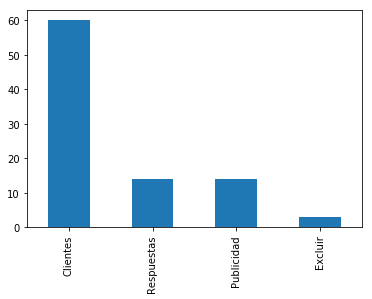

In [12]:
dfreal["tipo"].value_counts().plot(kind='bar', label ='Tipo')

In [13]:
#Nos quedamos solamente con los tweets de los clientes
dffinal = dfreal[(dfreal.tipo == ('Clientes'))]

In [14]:
#Definimos unas variables
textoreal = list(dffinal['text'])
username = list(dffinal['username'])
datereal = list(dffinal['date'])
valuereal = list(dffinal['value'])

In [15]:
#Ejecutamos el modelo sobre el fichero REAL
cols = ['txt', 'predlabel', 'value', 'username']
lst = []

i = 0
while (i < len(textoreal)):
    txt = textoreal[i]
    valu = valuereal[i]
    user = username[i]
    features = vectorizer.transform([txt])
    #print "predicted: ", classifier.predict(features)[0]
    #print "value: ", valu
    #print "texto:"
    i = i+1
    lst.append([txt, classifier.predict(features)[0], valu, user])

dfinal = pd.DataFrame(lst, columns=cols)

In [16]:
dfinal.head()

,txt,predlabel,value,username
0,que gentuza,neg,0,abelino01
1,he intentenyado leer tarifa web de verti y he...,pos,0,albaalegree
2,a lo mejor si se quema la casa entera y muere ...,pos,-2,antoniajbernal
3,verti seguros apk android ift.tt/2vbiyer,pos,0,apk_rules
4,sigo esperando alguna repuesta es una verguenz...,neg,-1,argentobcn46


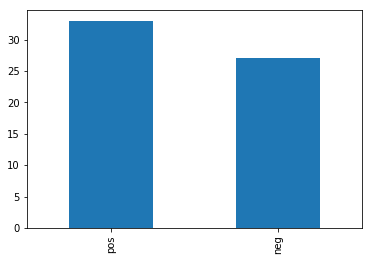

In [17]:
#Reparto de las predicciones
dfinal['predlabel'].value_counts().plot(kind='bar', label ='Predicciones')
#dfinal.hist(by='predlabel', bins=20)

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         2.,  0.,  2.,  2.,  5.,  9.,  3.]),
 array([-22. , -20.8, -19.6, -18.4, -17.2, -16. , -14.8, -13.6, -12.4,
        -11.2, -10. ,  -8.8,  -7.6,  -6.4,  -5.2,  -4. ,  -2.8,  -1.6,
         -0.4,   0.8,   2. ]),
 <a list of 20 Patch objects>)

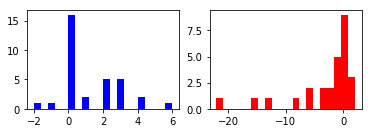

In [18]:
#Graficamos las notas de los tweets separando las predicciones
import matplotlib.pyplot as plt
# Crea los gráficos en el propio notebook
%matplotlib inline 
import numpy as np

dfinalpos = dfinal[(dfinal.predlabel == ('pos'))]
dfinalneg = dfinal[(dfinal.predlabel == ('neg'))]
#dfinalpos = dfinalpos.values
plt.figure(1)
plt.subplot(2,2,1)
plt.hist(dfinalpos.value, label = "Positivos Predichos", color = "blue", bins = 20)
plt.subplot(2,2,2)
plt.hist(dfinalneg.value, label = "Negativos Predichos", color = "red", bins = 20)

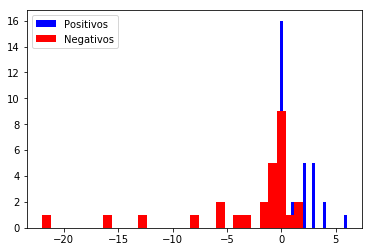

In [19]:
bins =20
plt.hist(dfinalpos.value, bins=30, label='Positivos', color = 'blue')
plt.hist(dfinalneg.value, label='Negativos', color = 'red', bins=30)
plt.legend(loc='upper left')
plt.show()

In [20]:
#Vemos los casos de los falsos negativos
dffalneg = dfinal[(dfinal.predlabel == ('neg'))]
dffalneg = dffalneg[(dffalneg.value > 0)]
dffalneg

,txt,predlabel,value,username
26,a este paso al metro de granada no lo va a que...,neg,2,M_A_Reyes
35,vertiseguros primer parte y primera sorpresa d...,neg,2,nikolaimad
49,me han subido la poliza un 40% y sin dar un so...,neg,1,rafaparadela


In [21]:
#Falsos positivos
dffalpos = dfinal[(dfinal.predlabel == ('pos'))]
dffalpos = dffalpos[(dffalpos.value < 0)]
dffalpos

,txt,predlabel,value,username
2,a lo mejor si se quema la casa entera y muere ...,pos,-2,antoniajbernal
48,desconectando del trabajo noemigargon vertiseg...,pos,-1,pedroserranot


In [22]:
#Vemos como han quedado los tweets catalogados al principio como neutros
dfneutros = dfinal[(dfinal.value == 0)]
dfneutros.head()

,txt,predlabel,value,username
0,que gentuza,neg,0,abelino01
1,he intentenyado leer tarifa web de verti y he...,pos,0,albaalegree
3,verti seguros apk android ift.tt/2vbiyer,pos,0,apk_rules
5,el anuncio de vertiseguros en spotifyspain,neg,0,DaniOzark
7,hola vertiseguros como tengo que proceder para...,neg,0,Javivix21


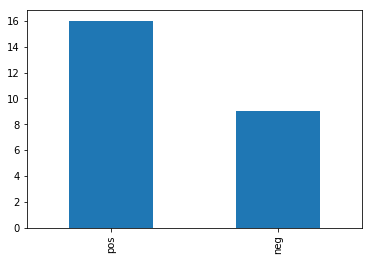

In [23]:
#Hacemos un reparto de las predicciones para los tweets neutros
dfneutros['predlabel'].value_counts().plot(kind='bar')

In [24]:
#Importamos el fichero real para asignarle las predicciones
dneutros = pd.read_csv('DATA_SALIDA/fichero_salida.txt', header=0, sep="|", encoding = "ISO-8859-1")
dneutros.index = pd.DatetimeIndex(dneutros.date)
dneutros = dneutros[(dneutros.tipo == ('Clientes'))]
dneutros = dneutros[(dneutros.value == 0)]
dneutros['n'] = 1
dneutros.count()

username     3627
date         3627
retweets     3627
favorites    3627
text         3627
geo             0
mentions     2183
hashtags     1188
tid          3546
fecha        3627
anyo         3627
mes          3627
dia          3627
horacomp     3627
hora         3627
minuto       3627
value        3627
palapos      3627
palaneg      3627
txtnosw      3620
tipo         3627
twpos        3627
twneu        3627
twneg        3627
n            3627
dtype: int64

In [25]:
#Definimos unas variables
textoreal = list(dneutros['text'])
username = list(dneutros['username'])
datereal = list(dneutros['date'])
valuereal = list(dneutros['value'])
len(textoreal)

3627

In [26]:
#Ejecutamos el modelo sobre el fichero REAL
cols = ['txt', 'predlabel', 'value', 'username', 'date']
lst = []

i = 0
while (i < len(textoreal)):
    txt = textoreal[i]
    valu = valuereal[i]
    user = username[i]
    dat = datereal[i]
    features = vectorizer.transform([txt])
    #print "predicted: ", classifier.predict(features)[0]
    #print "value: ", valu
    #print "texto:"
    i = i+1
    lst.append([txt, classifier.predict(features)[0], valu, user, dat])

dfinalneutro = pd.DataFrame(lst, columns=cols)

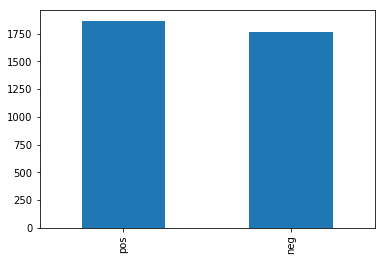

In [27]:
dfinalneutro['predlabel'].value_counts().plot(kind='bar')

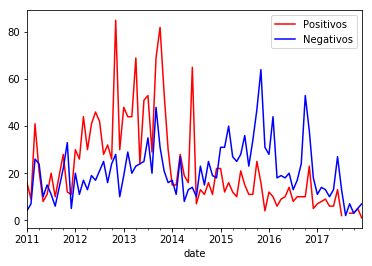

In [28]:
dfinalneutro['n'] = 1
dfinalneutro.index = pd.DatetimeIndex(dfinalneutro.date)
dfinalneupos = dfinalneutro[(dfinalneutro.predlabel == ('pos'))]
dfinalneuneg = dfinalneutro[(dfinalneutro.predlabel == ('neg'))]

dfinalneupossum = dfinalneupos.resample('M').sum()
dfinalneuneg = dfinalneuneg.resample('M').sum()

dfinalneupossum['2011-01':'2017-12'].n.plot(label='Positivos', color="red", legend='POSITIVOS')
dfinalneuneg['2011-01':'2017-12'].n.plot(label='Negativos', color="blue", legend='NEGATIVOS')